In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

%matplotlib inline

In [44]:
#step 1: Add sentiment of tweets to loaded DataFrame

def add_sentiment_to_df(df):
    sent = []
    for i in range(len(df)):
        analysis = TextBlob(str(df["tweet_text"].iloc[i]))
        if analysis.sentiment.polarity >= 0.1:
             sent.append('positive')
        elif analysis.sentiment.polarity <= -0.1:
            sent.append('negative')
        else:
            sent.append('neutral')
    df["sentiment"] = sent
    return df

In [45]:
#step 2: Check for each cancer type in tweets:

def cancer_types_counts(df):
    cancer_types_count = [0]*16 #will hold the counts of each type

    for i in range(len(df)):
        if ("breast" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[0] += 1
        elif ("skin" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[1] += 1
        elif ("lung" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[2] += 1
        elif ("prostate" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[3] += 1
        elif ("colorectal" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[4] += 1
        elif ("bladder" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[5] += 1
        elif ("kidney" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[6] += 1
        elif ("brain" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[7] += 1
        elif ("blood" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[8] += 1
        elif ("liver" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[9] += 1
        elif ("thyroid" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[10] += 1
        elif ("pancreatic" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[11] += 1
        elif ("stomach" and "cancer") in df.tweet_text.iloc[i]:
            cancer_types_count[12] += 1
        elif "melanoma" in df.tweet_text.iloc[i]:
            cancer_types_count[13] += 1
        elif "lymphoma" in df.tweet_text.iloc[i]:
            cancer_types_count[14] += 1
        elif "leukemia" in df.tweet_text.iloc[i]:
            cancer_types_count[15] += 1

    return cancer_types_count

In [46]:
#step3: plotting the cancer types counts
#plotting these stats

def plot_data_with_labels(labels, data, graph_title):    
    x = np.arange(len(labels))
    plt.bar(x,data, width=0.3,color='b')
    plt.title(graph_title)
    plt.xticks(x, labels, rotation=90)

In [47]:
# step 4: tweets distribution over months

def tweets_distribution_over_months(df):
    #labels = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]
    monthly_distribution = [0]*12

    for i in range(len(df)):
        if df.month_of_tweet.iloc[i] == 1:
            monthly_distribution[0] += 1
        elif df.month_of_tweet.iloc[i] == 2:
            monthly_distribution[1] += 1
        elif df.month_of_tweet.iloc[i] == 3:
            monthly_distribution[2] += 1
        elif df.month_of_tweet.iloc[i] == 4:
            monthly_distribution[3] += 1
        elif df.month_of_tweet.iloc[i] == 5:
            monthly_distribution[4] += 1
        elif df.month_of_tweet.iloc[i] == 6:
            monthly_distribution[5] += 1
        elif df.month_of_tweet.iloc[i] == 7:
            monthly_distribution[6] += 1
        elif df.month_of_tweet.iloc[i] == 8:
            monthly_distribution[7] += 1
        elif df.month_of_tweet.iloc[i] == 9:
            monthly_distribution[8] += 1
        elif df.month_of_tweet.iloc[i] == 10:
            monthly_distribution[9] += 1
        elif df.month_of_tweet.iloc[i] == 11:
            monthly_distribution[10] += 1
        elif df.month_of_tweet.iloc[i] == 12:
            monthly_distribution[11] += 1
    
    return monthly_distribution



In [48]:
#Step 5: Checking treatement news and death news in tweets

def treatement_and_death_with_charts(df, graph_title):
    treatement = 0
    die = 0

    for i in range(len(df)):
        if ("treat" in df.tweet_text.iloc[i] or "treatement" in df.tweet_text.iloc[i] or "cure" in df.tweet_text.iloc[i]) and df.sentiment.iloc[i] == "positive":
            treatement += 1
        elif ("die" in df.tweet_text.iloc[i] or "dead" in df.tweet_text.iloc[i] or "killed" in df.tweet_text.iloc[i] or "death" in df.tweet_text.iloc[i]) and df.sentiment.iloc[i] == "negative":
            die += 1

    #Drawing pie chart
    sizes = [treatement, die]
    colors = ['yellowgreen', 'gold']
    labels = ["Treatment news", "death news"]
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title(graph_title)
    plt.axis('equal')
    plt.tight_layout()

In [49]:
#Step 6: Tweets distribution in countries

def tweets_distribution_in_countries(files_dir, region):
    csv_files =[]
    all_files = os.listdir(files_dir)
    for file in all_files:
        if '.csv' in file and len(file.split('_')) == 1:
            csv_files.append(files_dir + file)

    countries_names = []
    country_tweets_count = []
    for i in csv_files:
        countries_names.append(i.split('/')[-1][:-4])
        country_tweets_count.append(len(pd.read_csv(i)))


    #plotting tweets distribution
    plt.figure(figsize=(15,4))   #to increase width of figure
    plt.bar(range(len(countries_names)), country_tweets_count, align='center')
    plt.xticks(range(len(countries_names)), countries_names, rotation=90)
    plt.title('Tweets distribution over '+ region + 'countries')

In [50]:
# Step 7: main causes of cancers.

def cancer_causes(df):
    causes = ['smoking','weight','sunlight','uv','alcohol','radiation',
         'hormones','pollution','food','rays','genes']
    causes_counts = [0]*11

    for i in range(len(df)):
        for j in range(len(causes)):
            if causes[j] in df.tweet_text.iloc[i] and (df.sentiment.iloc[i] == "negative" or df.sentiment.iloc[i] == "neutral"):
                causes_counts[j] += 1
     
    plot_data_with_labels(causes, causes_counts, "Main causes of cancer")

In [51]:
# Step 8: popular Treatements
def cancer_treatements(df):
    treatements_types = ['surgery','radiation therapy','chemotherapy',
           'targeted therapy','hormone therapy','stem cell transplant',
           'medicine','gene therapy','cell transfer therapy','drug therapy']
    treatemnts_counts = [0]*10

    for i in range(len(df)):
        for j in range(len(treatements_types)):
            if treatements_types[j] in df.tweet_text.iloc[i] and (df.sentiment.iloc[i] == "positive" or df.sentiment.iloc[i] == "neutral"):
                treatemnts_counts[j] += 1
     
    #Drawing pie chart
    sizes = treatemnts_counts
    #colors = ['yellowgreen', 'gold']
    labels = treatements_types
    patches, texts = plt.pie(sizes, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title("Percentages of common cancer treatements")
    plt.axis('equal')
    plt.tight_layout()

In [52]:
#step 9: popular drugs
def cancer_drugs(df):
    drugs = ['avastin','revlimid','rituxan','herceptin','imbruvica',
               'gleevec','alimta','velcade','erbitux','gardasil']
    drugs_counts = [0]*10

    for i in range(len(df)):
        for j in range(len(drugs)):
            if drugs[j] in df.tweet_text.iloc[i]:
                drugs_counts[j] += 1
     
    plot_data_with_labels(drugs, drugs_counts, "popular drugs")


# 1- European countries

In [53]:
# loading data
europe_tweets_file = r"D:/Samin- Cancer tweets/europe/europe_tweets.xlsx"
europe_df = pd.read_excel(europe_tweets_file)

In [54]:
# Step 1:
europe_df_with_sent = add_sentiment_to_df(europe_df)

In [55]:
#Step 2:
europe_cancer_types_counts = cancer_types_counts(europe_df)

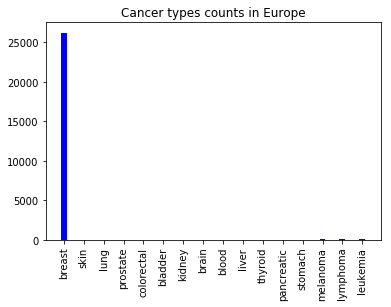

In [56]:
cancer_types = ('breast' ,'skin' ,'lung' ,'prostate' ,'colorectal' ,'bladder','kidney', 'brain', 'blood', 
                'liver', 'thyroid', 'pancreatic','stomach', 'melanoma', 'lymphoma', 'leukemia')

#step 3: plotting cancer_types_counts in Europe
plot_data_with_labels(cancer_types, europe_cancer_types_counts, "Cancer types counts in Europe")

In [57]:
#Step 4:
europe_tweets_distribution_over_months = tweets_distribution_over_months(europe_df)

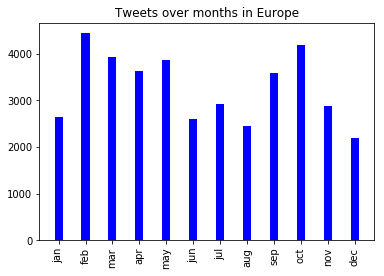

In [58]:
months = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')
plot_data_with_labels(months, europe_tweets_distribution_over_months, "Tweets over months in Europe")

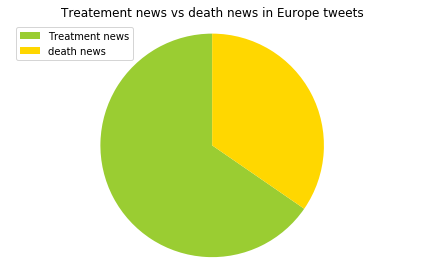

In [59]:
#step 5:
treatement_and_death_with_charts(europe_df, "Treatement news vs death news in Europe tweets")

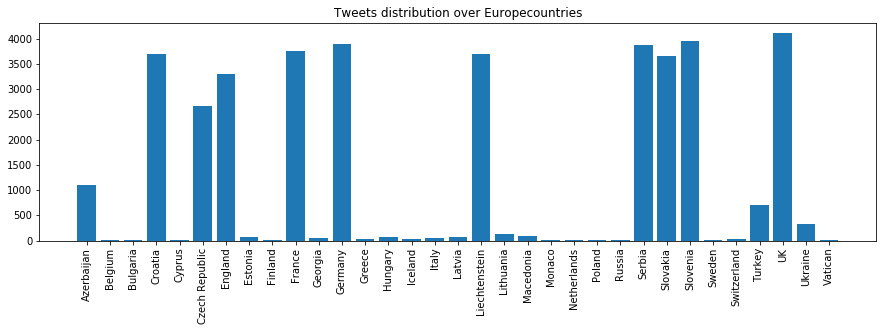

In [60]:
#Step 6:
europe_files_dir = r'D:/Samin- Cancer tweets/europe/'
tweets_distribution_in_countries(europe_files_dir, "Europe")

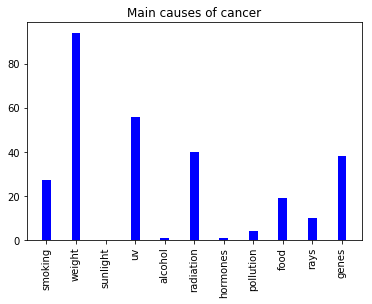

In [61]:
#Step 7:
cancer_causes(europe_df)

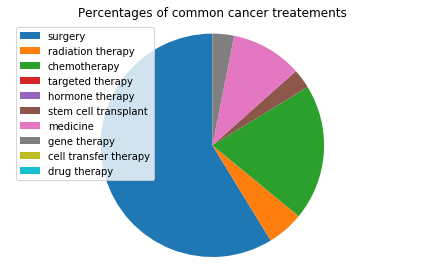

In [62]:
#step 8:
cancer_treatements(europe_df)

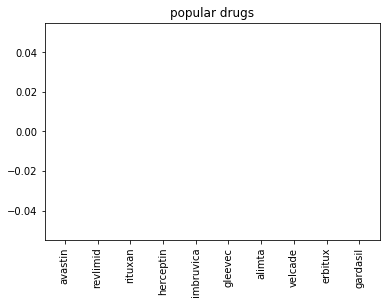

In [63]:
#step 9:
cancer_drugs(europe_df)

# 2- Asian countries

In [64]:
# loading data
asian_tweets_file = r"D:/Samin- Cancer tweets/asia/asian_tweets.xlsx"
asian_df = pd.read_excel(asian_tweets_file)

In [65]:
# Step 1:
asian_df_with_sent = add_sentiment_to_df(asian_df)

In [66]:
#Step 2:
asian_cancer_types_counts = cancer_types_counts(asian_df)

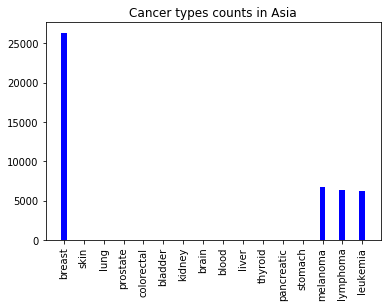

In [67]:
#step 3: 
plot_data_with_labels(cancer_types, asian_cancer_types_counts, "Cancer types counts in Asia")

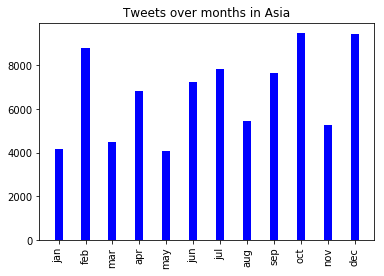

In [68]:
#Step 4:
asian_tweets_distribution_over_months = tweets_distribution_over_months(asian_df)
plot_data_with_labels(months, asian_tweets_distribution_over_months, "Tweets over months in Asia")

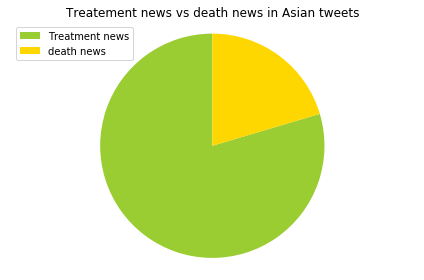

In [69]:
#step 5:
treatement_and_death_with_charts(asian_df, "Treatement news vs death news in Asian tweets")

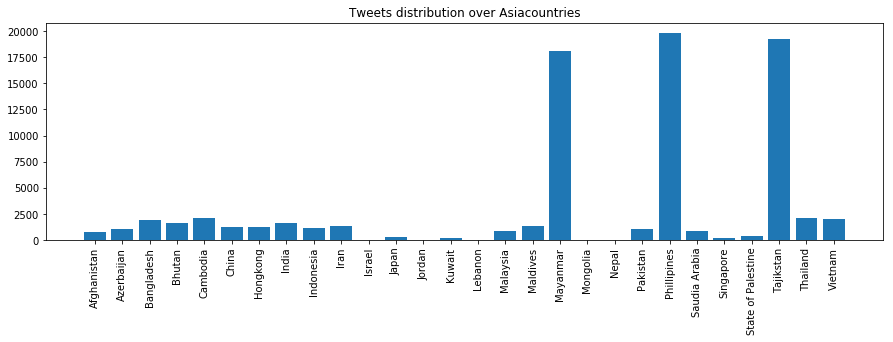

In [70]:
#Step 6:
asian_files_dir = r'D:/Samin- Cancer tweets/asia/'
tweets_distribution_in_countries(asian_files_dir, "Asia")

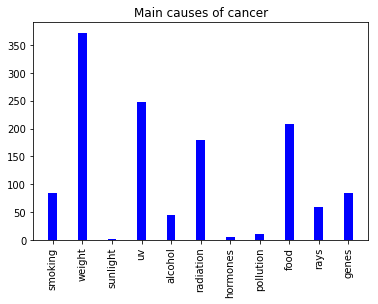

In [71]:
#Step 7:
cancer_causes(asian_df)

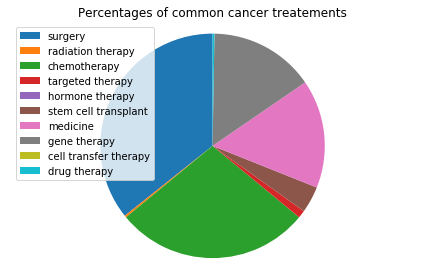

In [72]:
#step 8:
cancer_treatements(asian_df)

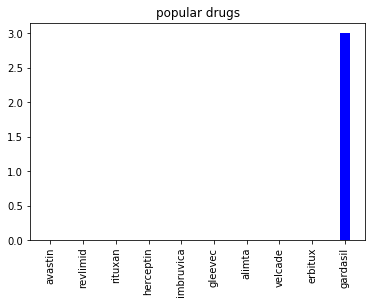

In [73]:
#step 9:
cancer_drugs(asian_df)

# 3- Nourth American (NA)

In [74]:
# loading data
na_tweets_file = r"D:/Samin- Cancer tweets/na/na_tweets.xlsx"
na_df = pd.read_excel(na_tweets_file)

In [75]:
# Step 1:
na_df_with_sent = add_sentiment_to_df(na_df)

In [76]:
#Step 2:
na_cancer_types_counts = cancer_types_counts(na_df)

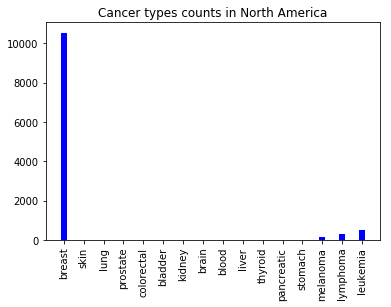

In [77]:
#step 3:
plot_data_with_labels(cancer_types, na_cancer_types_counts, "Cancer types counts in North America")

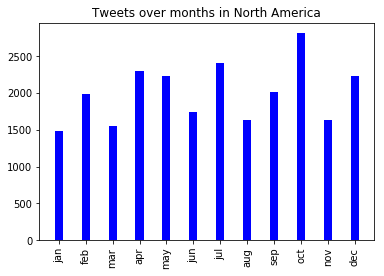

In [78]:
#Step 4:
na_tweets_distribution_over_months = tweets_distribution_over_months(na_df)
plot_data_with_labels(months, na_tweets_distribution_over_months, "Tweets over months in North America")

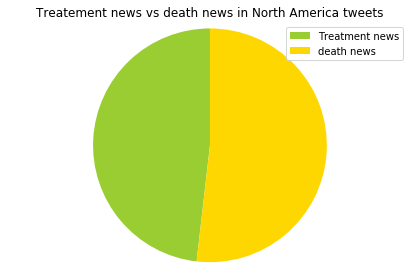

In [79]:
#step 5:
treatement_and_death_with_charts(na_df, "Treatement news vs death news in North America tweets")

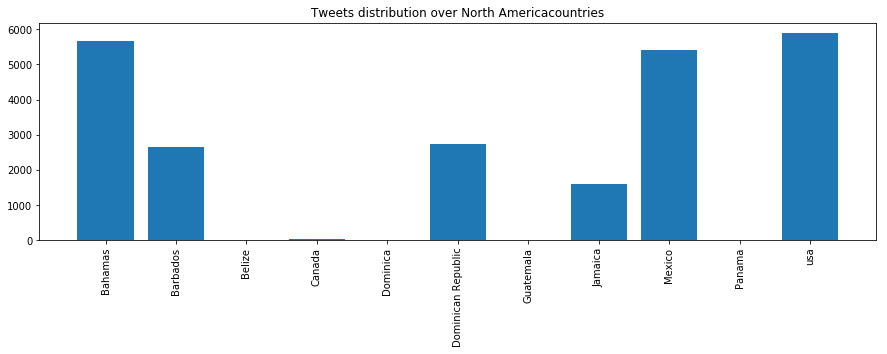

In [80]:
#Step 6:
na_files_dir = r'D:/Samin- Cancer tweets/na/'
tweets_distribution_in_countries(na_files_dir, "North America")

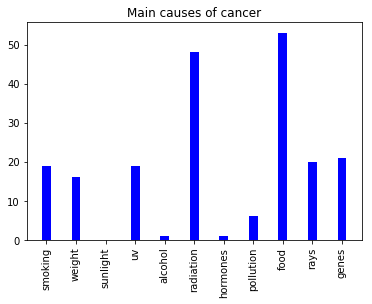

In [81]:
#Step 7:
cancer_causes(na_df)

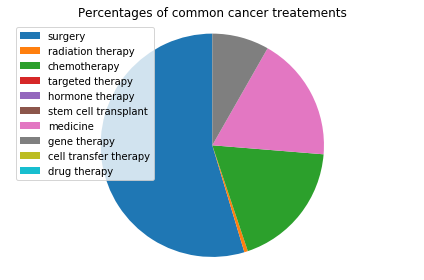

In [82]:
#step 8:
cancer_treatements(na_df)

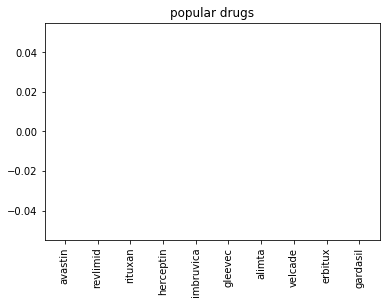

In [83]:
#step 9:
cancer_drugs(na_df)

# 4- Subcontinent countries

In [87]:
# loading data
subcontinent_tweets_file = r"D:/Samin- Cancer tweets/subcontinent/subcontinent_tweets.xlsx"
subcontinent_df = pd.read_excel(subcontinent_tweets_file)

In [88]:
# Step 1:
subcontinent_df_with_sent = add_sentiment_to_df(subcontinent_df)

In [89]:
#Step 2:
subcontinent_cancer_types_counts = cancer_types_counts(subcontinent_df)

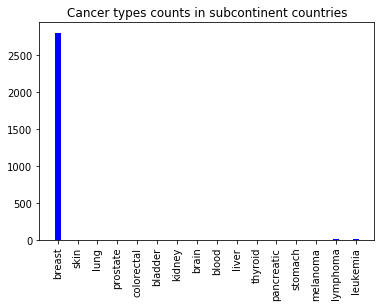

In [90]:
#step 3:
plot_data_with_labels(cancer_types, subcontinent_cancer_types_counts, "Cancer types counts in subcontinent countries")

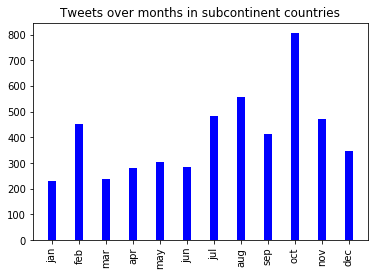

In [91]:
#Step 4:
subcontinent_tweets_distribution_over_months = tweets_distribution_over_months(subcontinent_df)
plot_data_with_labels(months, subcontinent_tweets_distribution_over_months, "Tweets over months in subcontinent countries")

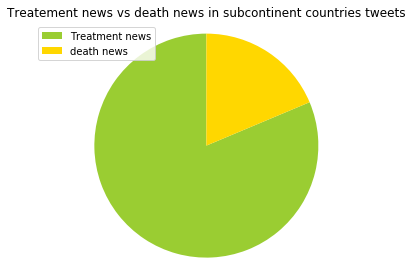

In [92]:
#step 5:
treatement_and_death_with_charts(subcontinent_df, "Treatement news vs death news in subcontinent countries tweets")

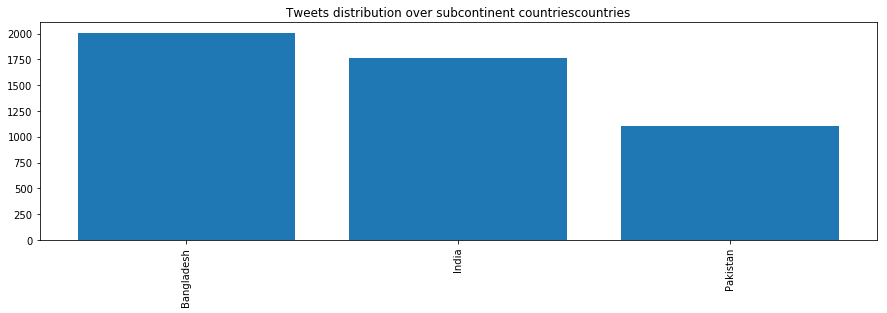

In [93]:
#Step 6:
subcontinent_files_dir = r'D:/Samin- Cancer tweets/subcontinent/'
tweets_distribution_in_countries(subcontinent_files_dir, "subcontinent countries")

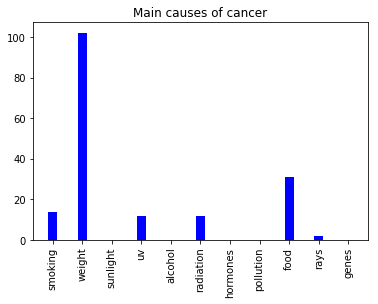

In [94]:
#Step 7:
cancer_causes(subcontinent_df)

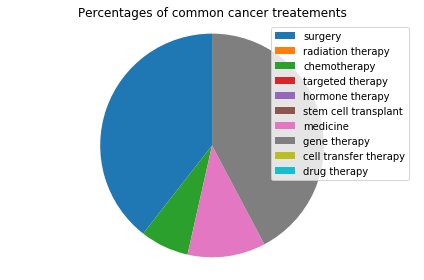

In [95]:
#step 8:
cancer_treatements(subcontinent_df)

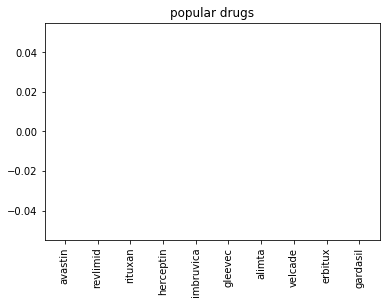

In [96]:
#step 9:
cancer_drugs(subcontinent_df)